# Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv")

data

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

In [3]:
data[data.isnull().any(axis=1)]

Unnamed: 0  Year  Wheat  Wages
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

Nous supprimons ces lignes qui ne contiennent pas des données valables


In [5]:
data_1 = data.dropna().copy()

data_1

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00

In [31]:
Y1 = data_1['Wages'].astype(int)
Y2 = data_1['Wheat'].astype(int)
X1 = data_1['Year'].astype(int)
Y1

0      5
1      5
2      5
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
11     6
12     6
13     6
14     6
15     6
16     6
17     6
18     6
19     6
20     6
21     6
22     7
23     7
24     7
25     8
26     8
27     9
28    10
29    11
30    11
31    12
32    13
33    13
34    13
35    14
36    14
37    15
38    15
39    16
40    17
41    18
42    19
43    21
44    23
45    25
46    27
47    28
48    29
49    30
Name: Wages, dtype: int64

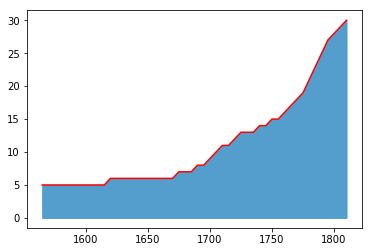

In [7]:
plt.plot(X1,Y1,'r')
plt.fill_between(X1, Y1,color='#539ecd')

<BarContainer object of 50 artists>

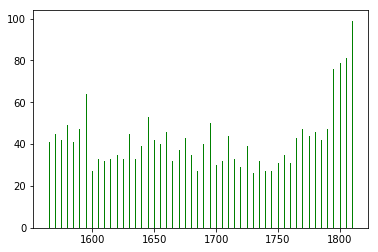

In [8]:
plt.bar(X1,Y2,color='green')


<BarContainer object of 50 artists>

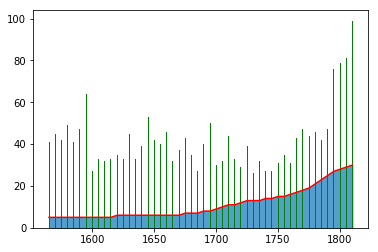

In [9]:
fig , ax=plt.subplots()
ax.plot(X1,Y1,'r')
plt.fill_between(X1, Y1,color='#539ecd')
ax.bar(X1,Y2,color='green')

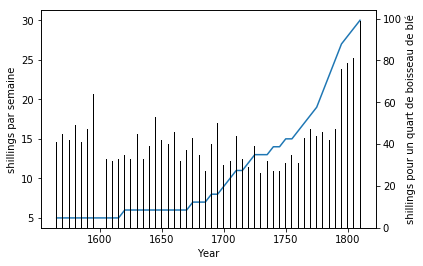

In [26]:
fig , ax=plt.subplots()
ax.plot(X1,Y1)
ax.set_xlabel('Year')
ax.set_ylabel('shillings par semaine')

ax1 = ax.twinx()
ax1.bar(X1,Y2,color = 'black')
ax1.set_ylabel('shillings pour un quart de boisseau de blé')

plt.show()

In [33]:
Y3=Y1/Y2
Y3

0     0.121951
1     0.111111
2     0.119048
3     0.102041
4     0.121951
5     0.106383
6     0.078125
7     0.185185
8     0.151515
9     0.156250
10    0.151515
11    0.171429
12    0.181818
13    0.133333
14    0.181818
15    0.153846
16    0.113208
17    0.142857
18    0.150000
19    0.130435
20    0.187500
21    0.162162
22    0.162791
23    0.200000
24    0.259259
25    0.200000
26    0.160000
27    0.300000
28    0.312500
29    0.250000
30    0.333333
31    0.413793
32    0.333333
33    0.500000
34    0.406250
35    0.518519
36    0.518519
37    0.483871
38    0.428571
39    0.516129
40    0.395349
41    0.382979
42    0.431818
43    0.456522
44    0.547619
45    0.531915
46    0.355263
47    0.354430
48    0.358025
49    0.303030
dtype: float64

Text(0.5,0,'Year')

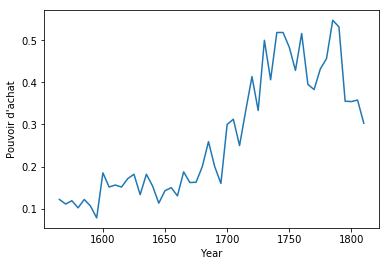

In [40]:
plt.plot(X1,Y3)
plt.ylabel("Pouvoir d'achat")
plt.xlabel('Year')

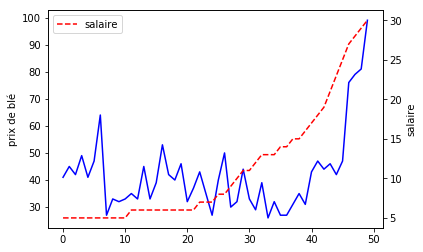

In [61]:
fig , ax=plt.subplots()
ax1 = ax.twinx()
ax1.plot(Y1,'r--', label = "salaire")
ax1.set_ylabel('salaire')
plt.legend()

ax.plot(Y2,'b', label = "prix de blé")
ax.set_ylabel('prix de blé')

plt.legend()


plt.show()
